In [100]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def init_receiver(message_num=4):
  Q_receiver = {}

  for msg in range(message_num):
    Q_receiver[msg] = {}
    for state in range(25):
      Q_receiver[msg][state] = []
      for action in ['u', 'd', 'l', 'r']:
        Q_receiver[msg][state].append(0)
  return Q_receiver

def init_sender(message_num=4):
  Q_sender = {}
  for state in range(25):
    Q_sender[state] = []
    for msg in range(message_num):
      Q_sender[state].append(0)
  return Q_sender

In [28]:
def init_reward(room_type):
  if room_type == 'four':
    banned = [2,10,11,12,13,14,22]
  elif room_type == 'maze':
    banned = [6,7,8,12,13,16,21,22,23,24]
  else:
    banned = [12]
  
  reward = random.randint(0, 24)
  while reward in banned:
    reward = random.randint(0, 24)
  return reward

def next_state(state, action, room_type):
  if room_type == 'four':
    banned = [2,10,11,13,14,22]
  elif room_type == 'maze':
    banned = [6,7,8,13,16,21,22,23,24]
  else:
    banned = []
  
  if action == 0 and state < 5:
    return state
  if action == 1 and state > 19:
    return state
  if action == 2 and state % 5 == 0:
    return state
  if action == 3 and state % 5 == 4:
    return state
  
  new_state = None

  if action == 0:
    new_state = state - 5
  elif action == 1:
    new_state = state + 5
  elif action == 2:
    new_state = state - 1
  elif action == 3:
    new_state = state + 1
  
  return state if new_state in banned else new_state

def senderAction(Q_sender, reward, ep):
  actions = Q_sender[reward]
  actionNum = len(actions)
  ep2 = random.uniform(0, 1)

  if ep2 <= ep:
    num = random.randint(0, actionNum - 1)
    return num
  else:
    m = max(actions)
    indexes = [i for i, j in enumerate(actions) if j == m]
    return random.choice(indexes)
    #return actions.index(max(actions))

def receiverAction(Q_receiver, msg, state, ep):
  actions = Q_receiver[msg][state]
  actionNum = len(actions)
  ep2 = random.uniform(0, 1)

  if ep2 <= ep:
    return random.randint(0, actionNum - 1)
  else:
    m = max(actions)
    indexes = [i for i, j in enumerate(actions) if j == m]
    return random.choice(indexes)


In [84]:
def episode(Q_sender, Q_receiver, ep, alp, dis, room_type, train=True):
  if not train:
    ep = 0
  
  term = 1 - dis

  reward = init_reward(room_type)
  msg = senderAction(Q_sender, reward, ep)

  state = 12
  actionsTaken = 0
  while(True):
    actionsTaken += 1
    actionChosen = receiverAction(Q_receiver, msg, state, ep)
    newState = next_state(state, actionChosen, room_type)
    
    if train:
      r = 1 if newState == reward else 0
      Q_receiver[msg][state][actionChosen] += alp * (r + (dis * max(Q_receiver[msg][newState])) - Q_receiver[msg][state][actionChosen])
    state = newState

    if newState == reward:
      if train:
        Q_sender[reward][msg] = alp * (1) + (1 - alp) * Q_sender[reward][msg]
      dis_reward = (dis ** actionsTaken) * 1
      return Q_sender, Q_receiver, dis_reward
    else:
      term2 = random.uniform(0, 1)
      if term2 <= term:
        if train:
          Q_sender[reward][msg] = (1 - alp) * Q_sender[reward][msg]
        return Q_sender, Q_receiver, 0

def do_n_episodes(msg_nums, nEPs, ep, a0, af, dis, room_type):
  alp = a0
  Q_sender = init_sender(msg_nums)
  Q_receiver = init_receiver(msg_nums)

  for i in range(nEPs):
    Q_sender, Q_receiver, _ = episode(Q_sender, Q_receiver, ep, alp, dis, room_type, train=True)
    alp -= ((a0 - af) / nEPs)
  
  rewards = [5]
  for i in range(1000):
    _, _, reward = episode(Q_sender, Q_receiver, 0, 0, dis, room_type, train=False)
    rewards.append(reward)
  
  return Q_sender, Q_receiver, np.average(rewards)
 

In [124]:
# cs = []
# for i in range(10):
#   a, b, c = do_n_episodes(4, 100000, 0.1, 0.9, 0.01, 0.95, 'four')
#   cs.append(c)

In [123]:
# cs

In [122]:
# for key, val in b[3].items():
#   print(key, val.index(max(val)))

In [94]:
#a, b, c = do_n_episodes(4, 100000, 0.1, 0.9, 0.01, 0.95, 'four')
mean_001 = []
std_001 = []
mean_01 = []
std_01 = []
mean_04 = []
std_04 = []

numEPs = [10, 100, 1000, 10000, 50000, 100000]
for nEP in numEPs:
  dis_001 = []
  for i in range(10):
    _, _, d = do_n_episodes(4, nEP, 0.01, 0.9, 0.01, 0.95, 'four')
    dis_001.append(d)
  mean_001.append(np.mean(dis_001))
  std_001.append(np.std(dis_001))

  dis_01 = []
  for i in range(10):
    _, _, d = do_n_episodes(4, nEP, 0.1, 0.9, 0.01, 0.95, 'four')
    dis_01.append(d)
  mean_01.append(np.mean(dis_01))
  std_01.append(np.std(dis_01))

  dis_04 = []
  for i in range(10):
    _, _, d = do_n_episodes(4, nEP, 0.4, 0.9, 0.01, 0.95, 'four')
    dis_04.append(d)
  mean_04.append(np.mean(dis_04))
  std_04.append(np.std(dis_04))
  

In [99]:
loggys = [math.log10(x) for x in numEPs]

[1.0, 2.0, 3.0, 4.0, 4.698970004336019, 5.0]

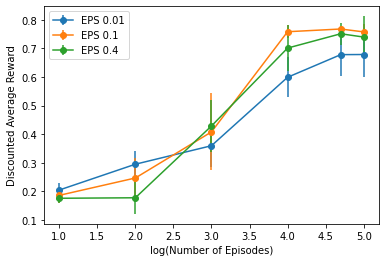

In [103]:
loggys = [math.log10(x) for x in numEPs]

plt.errorbar(loggys, mean_001, std_001, marker="o", label="EPS 0.01")
plt.errorbar(loggys, mean_01, std_01, marker="o", label="EPS 0.1")
plt.errorbar(loggys, mean_04, std_04, marker="o", label="EPS 0.4")
plt.legend(loc='upper left')
plt.xlabel("log(Number of Episodes)")
plt.ylabel("Discounted Average Reward")
plt.show()

In [104]:
mean_2 = []
std_2 = []
mean_4 = []
std_4 = []
mean_10 = []
std_10 = []

numEPs = [10, 100, 1000, 10000, 50000, 100000]
for nEP in numEPs:
  dis_2 = []
  for i in range(10):
    _, _, d = do_n_episodes(2, nEP, 0.1, 0.9, 0.01, 0.95, 'four')
    dis_2.append(d)
  mean_2.append(np.mean(dis_2))
  std_2.append(np.std(dis_2))

  dis_4 = []
  for i in range(10):
    _, _, d = do_n_episodes(4, nEP, 0.1, 0.9, 0.01, 0.95, 'four')
    dis_4.append(d)
  mean_4.append(np.mean(dis_4))
  std_4.append(np.std(dis_4))

  dis_10 = []
  for i in range(10):
    _, _, d = do_n_episodes(10, nEP, 0.1, 0.9, 0.01, 0.95, 'four')
    dis_10.append(d)
  mean_10.append(np.mean(dis_10))
  std_10.append(np.std(dis_10))
  

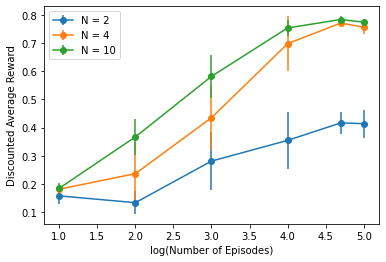

In [105]:
plt.errorbar(loggys, mean_2, std_2, marker="o", label="N = 2")
plt.errorbar(loggys, mean_4, std_4, marker="o", label="N = 4")
plt.errorbar(loggys, mean_10, std_10, marker="o", label="N = 10")
plt.legend(loc='upper left')
plt.xlabel("log(Number of Episodes)")
plt.ylabel("Discounted Average Reward")
plt.show()

In [106]:
mean_2 = []
std_2 = []
mean_3 = []
std_3 = []
mean_5 = []
std_5 = []

numEPs = [10, 100, 1000, 10000, 50000, 100000]
for nEP in numEPs:
  dis_2 = []
  for i in range(10):
    _, _, d = do_n_episodes(2, nEP, 0.1, 0.9, 0.01, 0.95, 'maze')
    dis_2.append(d)
  mean_2.append(np.mean(dis_2))
  std_2.append(np.std(dis_2))

  dis_3 = []
  for i in range(10):
    _, _, d = do_n_episodes(3, nEP, 0.1, 0.9, 0.01, 0.95, 'maze')
    dis_3.append(d)
  mean_3.append(np.mean(dis_3))
  std_3.append(np.std(dis_3))

  dis_5 = []
  for i in range(10):
    _, _, d = do_n_episodes(5, nEP, 0.1, 0.9, 0.01, 0.95, 'maze')
    dis_5.append(d)
  mean_5.append(np.mean(dis_5))
  std_5.append(np.std(dis_5))
  

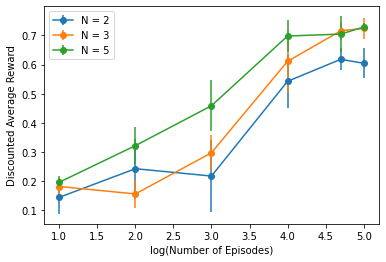

In [107]:
plt.errorbar(loggys, mean_2, std_2, marker="o", label="N = 2")
plt.errorbar(loggys, mean_3, std_3, marker="o", label="N = 3")
plt.errorbar(loggys, mean_5, std_5, marker="o", label="N = 5")
plt.legend(loc='upper left')
plt.xlabel("log(Number of Episodes)")
plt.ylabel("Discounted Average Reward")
plt.show()

In [113]:
mean_em = []
std_em = []

for nEP in numEPs:
  dis = []
  for i in range(10):
    _, _, d = do_n_episodes(1, nEP, 0.1, 0.9, 0.01, 0.95, 'empty')
    dis.append(d)
  mean_em.append(np.mean(dis))
  std_em.append(np.std(dis))

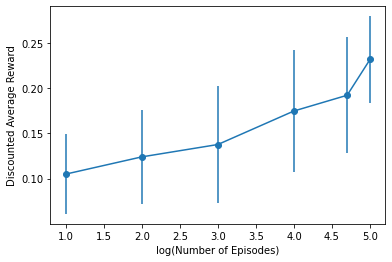

In [115]:
plt.errorbar(loggys, mean_em, std_em, marker="o", label="N = 2")
plt.xlabel("log(Number of Episodes)")
plt.ylabel("Discounted Average Reward")
plt.show()